>[Import Libraries & Dataset](#scrollTo=PIf8nipnpFWi)

>[Part 1](#scrollTo=WuhqczO7pLP4)

>[Part 2](#scrollTo=kvlplzB2pV4f)

>[Part 3](#scrollTo=ZLFORStVpnAp)

>[Part 4](#scrollTo=ggiIOiLKpznw)

>[Part 5](#scrollTo=EvOuxA0NqovX)

>[Part 6](#scrollTo=9jXi3WgMrB2g)

>>[Subpart A](#scrollTo=Vi9GXJZXshN2)

>>[Subpart B](#scrollTo=nYpvhMS8s7M_)

>>[Subpart C](#scrollTo=yNS2muQ5tMT3)

>>[Subpart D](#scrollTo=tvS0rlOPtvqO)

>>[Subpart E](#scrollTo=qONXAO_QtyCW)

>>>[First Try](#scrollTo=0Naz8NkUwOyO)

>>>[Second Try](#scrollTo=ANf5uod7wX1_)



# Import Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import warnings
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import apriori as apriori_SK, association_rules

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Uni_Sem01/Assignment04/groceries.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,citrus fruit,semi-finished bread,margarine,ready soups,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9829,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9830,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 1

In [ ]:
non_null_counts = dataset.notnull().sum(axis=1)
non_null_counts

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,3
1,1
2,4
3,4
4,5
...,...
9829,17
9830,1
9831,10
9832,4


In [ ]:
transaction_1_to_3 = dataset[(non_null_counts >= 1) & (non_null_counts <= 3)]
transaction_4_to_6 = dataset[(non_null_counts >= 4) & (non_null_counts <= 6)]
transaction_7_to_9 = dataset[(non_null_counts >= 7) & (non_null_counts <= 9)]
transaction_10_to_12 = dataset[(non_null_counts >= 10) & (non_null_counts <= 12)]
transaction_more_12 = dataset[(non_null_counts > 12)]

print(f'Number of the transactions with items length 1 to 3: {len(transaction_1_to_3)}')
print(f'Number of the transactions with items length 4 to 6: {len(transaction_4_to_6)}')
print(f'Number of the transactions with items length 7 to 9: {len(transaction_7_to_9)}')
print(f'Number of the transactions with items length 10 to 12: {len(transaction_10_to_12)}')
print(f'Number of the transactions with items length more than 12: {len(transaction_more_12)}')

Number of the transactions with items length 1 to 3: 5101
Number of the transactions with items length 4 to 6: 2504
Number of the transactions with items length 7 to 9: 1333
Number of the transactions with items length 10 to 12: 545
Number of the transactions with items length more than 12: 351


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(f'The sum of these sections are: {len(transaction_1_to_3)+len(transaction_4_to_6)+len(transaction_7_to_9)+len(transaction_10_to_12)+len(transaction_more_12)}, and the number of all items is: {dataset.shape[0]}')

The sum of these sections are: 9834, and the number of all items is: 9834


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


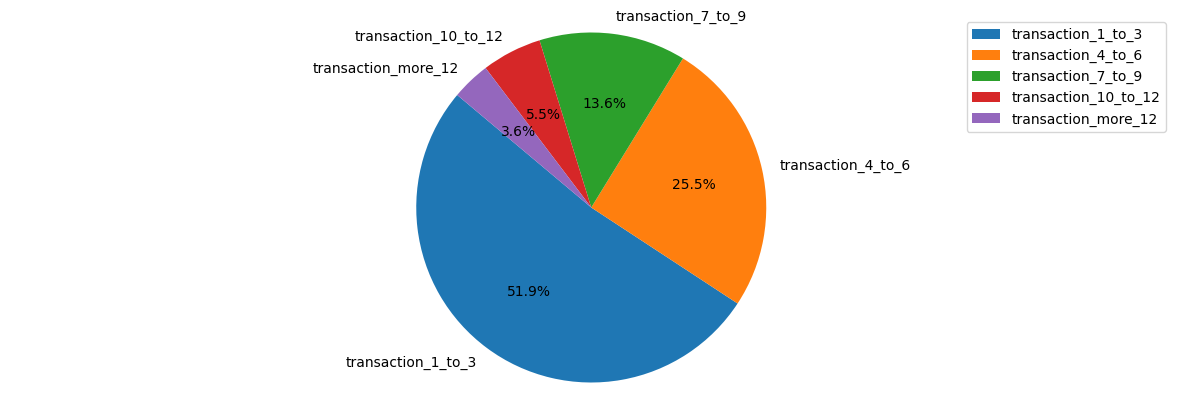

In [ ]:
labels = ['transaction_1_to_3', 'transaction_4_to_6', 'transaction_7_to_9', 'transaction_10_to_12', 'transaction_more_12']
data = [len(transaction_1_to_3), len(transaction_4_to_6), len(transaction_7_to_9), len(transaction_10_to_12), len(transaction_more_12)]

plt.figure(figsize=(15, 5))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend()
plt.show()

# Part 2

In [ ]:
top = []
for column in dataset.columns:
    top.append(dataset[column].value_counts())

temp = []
for column in range(len(top)):
    for i in range(len(top[column])):
            item = top[column].index[i]
            count = top[column].iloc[i]
            temp.append((item, count))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
merged_data = {}
for key, value in temp:
    if key in merged_data:
        merged_data[key] += value
    else:
        merged_data[key] = value

# Convert the dictionary back to a list of tuples
merged_data_list = list(merged_data.items())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
all_items = sorted(merged_data_list, key=lambda x: x[1], reverse=True)
top_10 = all_items[:10]
top_10

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('whole milk', 2513),
 ('other vegetables', 1903),
 ('rolls/buns', 1809),
 ('soda', 1715),
 ('yogurt', 1372),
 ('bottled water', 1087),
 ('root vegetables', 1072),
 ('tropical fruit', 1032),
 ('shopping bags', 969),
 ('sausage', 924)]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


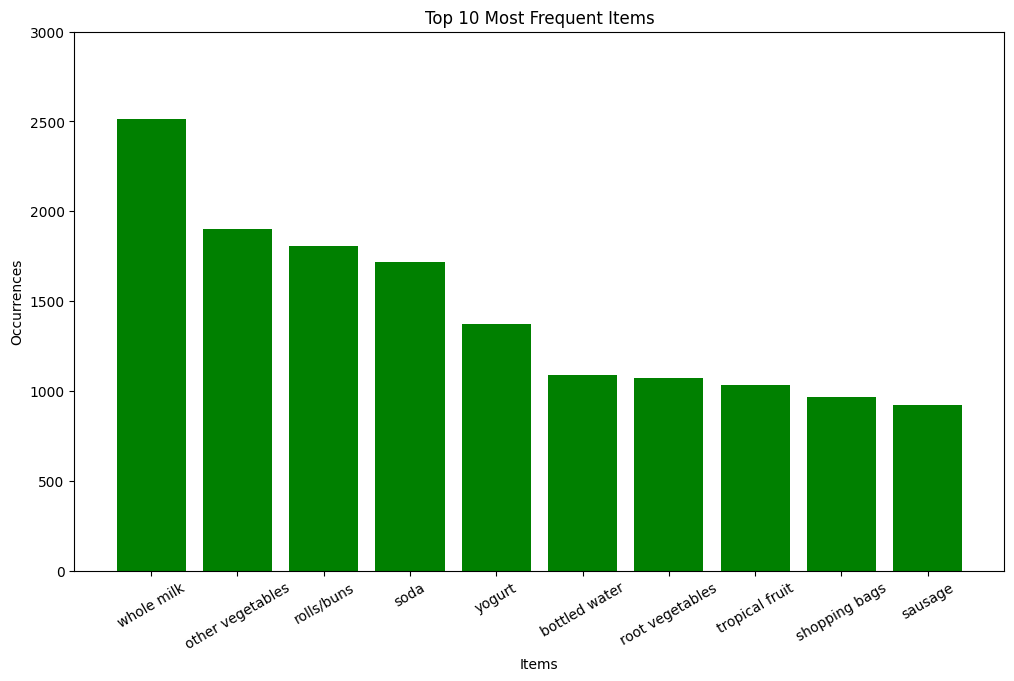

In [ ]:
labels = []
values = []
for key, value in top_10:
    labels.append(key)
    values.append(value)

plt.figure(figsize=(12, 7))
plt.bar(labels, values, color='green')
plt.xlabel('Items')
plt.xticks(rotation=30)
plt.ylabel('Occurrences')
plt.yticks(np.arange(0, 3001, 500))
plt.title('Top 10 Most Frequent Items')
plt.show()

# Part 3

In [ ]:
all_items = sorted(merged_data_list, key=lambda x: x[1], reverse=False)
least_10 = all_items[:10]
least_10

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('sound storage medium', 1),
 ('baby food', 1),
 ('preservation products', 2),
 ('bags', 4),
 ('kitchen utensil', 4),
 ('frozen chicken', 6),
 ('baby cosmetics', 6),
 ('toilet cleaner', 7),
 ('whisky', 8),
 ('salad dressing', 8)]

# Part 4

In [ ]:
values = []
for value in non_null_counts:
    values.append(value)

average_of_items = stat.mean(values)
median_of_items = stat.median(values)

print(f'The meadian is: {median_of_items}, and the average is: {round(average_of_items, 1)}')

The meadian is: 3.0, and the average is: 4.4


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Part 5

In [ ]:
def apriori(data, min_support_count):
    from itertools import combinations

    def get_support(itemset):
        return sum(1 for transaction in data if itemset.issubset(transaction))

    def join_step(itemsets, length):
        return set([i.union(j) for i in itemsets for j in itemsets if len(i.union(j)) == length])

    def prune_step(itemsets, min_support_count):
        return set([itemset for itemset in itemsets if get_support(itemset) >= min_support_count])

    itemsets = [frozenset([item]) for transaction in data for item in transaction]
    itemsets = prune_step(set(itemsets), min_support_count)
    length = 2
    frequent_itemsets = []

    while itemsets:
        frequent_itemsets.extend(itemsets)
        itemsets = join_step(itemsets, length)
        itemsets = prune_step(itemsets, min_support_count)
        length += 1

    return frequent_itemsets

# Sample data
transactions = [
    {'milk', 'butter', 'cheese', 'sugar'},
    {'butter', 'cheese', 'coffee', 'soup'},
    {'milk', 'sugar', 'coffee', 'soup'},
    {'milk', 'coffee', 'soup'},
    {'butter', 'sugar', 'soup'}
]

min_support_count = 3
frequent_itemsets = apriori(transactions, min_support_count)
print("Frequent Itemsets:", frequent_itemsets)
print()

Frequent Itemsets: [frozenset({'soup'}), frozenset({'milk'}), frozenset({'butter'}), frozenset({'sugar'}), frozenset({'coffee'}), frozenset({'coffee', 'soup'})]



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def eclat(data, min_support_count):
    from collections import defaultdict

    def get_support(itemset):
        return len(itemset)

    def eclat_recursive(prefix, itemsets, min_support_count):
        while itemsets:
            item, itemset = itemsets.pop()
            support = get_support(itemset)
            if support >= min_support_count:
                frequent_itemsets.append((prefix | {item}, support))
                suffix = []
                for other_item, other_itemset in itemsets:
                    intersection = itemset & other_itemset
                    if get_support(intersection) >= min_support_count:
                        suffix.append((other_item, intersection))
                eclat_recursive(prefix | {item}, suffix, min_support_count)

    itemsets = defaultdict(set)
    for idx, transaction in enumerate(data):
        for item in transaction:
            itemsets[item].add(idx)

    itemsets = [(item, itemset) for item, itemset in itemsets.items()]
    frequent_itemsets = []
    eclat_recursive(set(), itemsets, min_support_count)

    return frequent_itemsets

# Sample data
transactions = [
    {'milk', 'butter', 'cheese', 'sugar'},
    {'butter', 'cheese', 'coffee', 'soup'},
    {'milk', 'sugar', 'coffee', 'soup'},
    {'milk', 'coffee', 'soup'},
    {'butter', 'sugar', 'soup'}
]

min_support_count = 3
frequent_itemsets = eclat(transactions, min_support_count)
print("Frequent Itemsets:", frequent_itemsets)
print()

Frequent Itemsets: [({'soup'}, 4), ({'coffee', 'soup'}, 3), ({'coffee'}, 3), ({'butter'}, 3), ({'milk'}, 3), ({'sugar'}, 3)]



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Part 6

## Subpart A

In [ ]:
warnings.filterwarnings("ignore")

transactions = dataset.apply(lambda row: [item for item in row if pd.notnull(item)], axis=1).tolist()

df = pd.DataFrame(transactions)
df = df.stack().reset_index(level=1, drop=True).to_frame('item')
df['transaction'] = df.index
df = df.pivot_table(index='transaction', columns='item', aggfunc=lambda x: 1, fill_value=0)

frequent_itemsets = apriori_SK(df, min_support=0.005, use_colnames=True)

top_10_items = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
least_10_items = frequent_itemsets.sort_values(by='support', ascending=True).head(10)

print("Top 10 most frequent items:")
print(top_10_items)
print('-----------------------------------------')
print("Least 10 most frequent items:")
print(least_10_items)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 most frequent items:
      support            itemsets
117  0.255542        (whole milk)
73   0.193512  (other vegetables)
88   0.183954        (rolls/buns)
98   0.174395              (soda)
118  0.139516            (yogurt)
7    0.110535     (bottled water)
89   0.109010   (root vegetables)
110  0.104942    (tropical fruit)
96   0.098536     (shopping bags)
93   0.093960           (sausage)
-----------------------------------------
Least 10 most frequent items:
      support                                           itemsets
500  0.005084                      (other vegetables, ice cream)
872  0.005084                   (yogurt, newspapers, rolls/buns)
852  0.005084              (soda, yogurt, fruit/vegetable juice)
842  0.005084        (frozen vegetables, whole milk, rolls/buns)
836  0.005084         (frankfurter, whole milk, root vegetables)
823  0.005084  (other vegetables, whipped/sour cream, domesti...
822  0.005084            (other vegetables, soda, domestic eggs)
805  0

## Subpart B

In [ ]:
df = pd.DataFrame(transactions)
df = df.stack().reset_index(level=1, drop=True).to_frame('item')
df['transaction'] = df.index
df = df.pivot_table(index='transaction', columns='item', aggfunc=lambda x: 1, fill_value=0)

frequent_itemsets = apriori_SK(df, min_support=0.005, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2, num_itemsets=True)

sorted_rules = rules.sort_values(by='lift', ascending=False)

# Get the top 10 rules
top_10_rules =sorted_rules.head(10)
top_10_rules = top_10_rules[['consequents','support', 'confidence', 'lift']]
print("Top 10 rules sorted by lift:")
top_10_rules

Top 10 rules sorted by lift:


,consequents,support,confidence,lift
892,"(whole milk, tropical fruit)",0.005695,0.220472,5.211841
891,"(whole milk, yogurt)",0.005695,0.270531,4.828323
846,"(other vegetables, whole milk)",0.005491,0.352941,4.715793
865,"(other vegetables, whole milk)",0.007016,0.333333,4.453804
834,"(other vegetables, whole milk)",0.005796,0.327586,4.377015
839,"(yogurt, whole milk)",0.005084,0.241546,4.311002
845,"(whole milk, root vegetables)",0.005491,0.210117,4.295817
833,"(whole milk, root vegetables)",0.005796,0.200704,4.103379
829,(root vegetables),0.005796,0.445312,4.085078
870,"(other vegetables, whole milk)",0.005186,0.303571,4.056143


## Subpart C

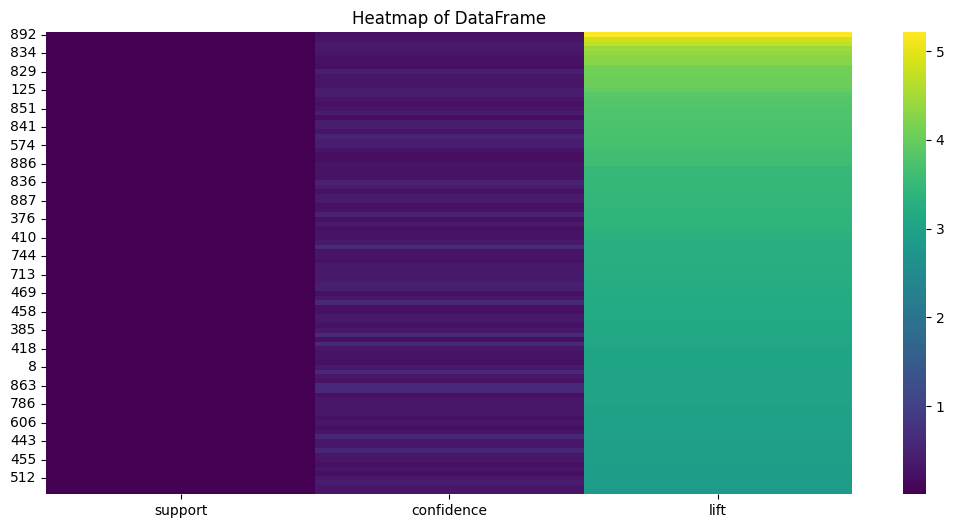

In [ ]:
top_100_rules = sorted_rules.head(100)
top_100_rules = top_100_rules[['support', 'confidence', 'lift']]

df_filled = top_100_rules.fillna(0)

# Create a heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(top_100_rules, annot=False, cmap='viridis')
plt.title('Heatmap of DataFrame')
plt.show()

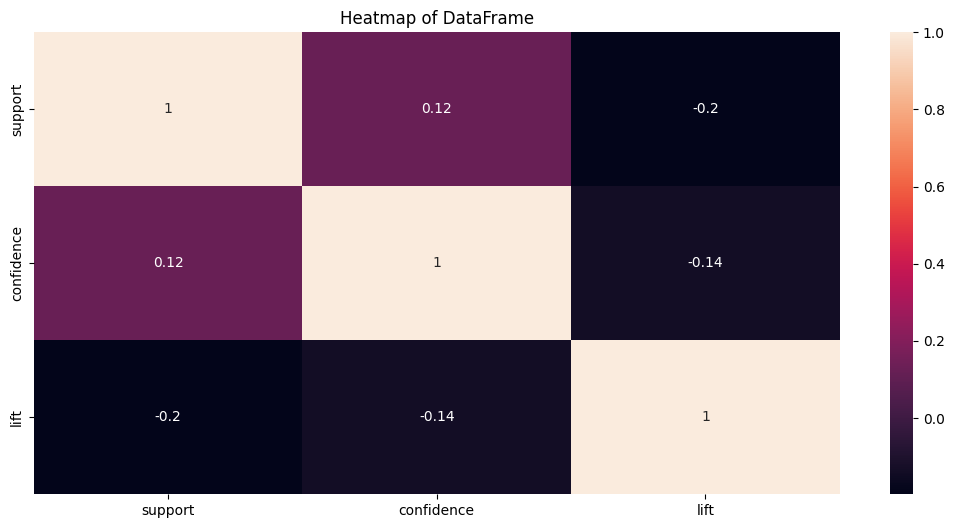

In [ ]:
top_100_rules = sorted_rules.head(100)
top_100_rules = top_100_rules[['support', 'confidence', 'lift']]

df_filled = top_100_rules.fillna(0)

# Create a heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(top_100_rules.corr(), annot=True)
plt.title('Heatmap of DataFrame')
plt.show()

## Subpart D

In [ ]:
temp = sorted(merged_data_list, key=lambda x: x[1], reverse=True)
best_selling_item = temp[0][0]
all_items = rules['consequents']
all_items
result = []

for item in all_items:
    # The first item should be the best selling item and have at least one following item
    if (best_selling_item == list(item)[0]) and len(list(item)) >= 2:
        if (len(result) <= 100):
            result.append(list(item))
        else:
             continue

result[:10]

[['whole milk', 'root vegetables'],
 ['whole milk', 'root vegetables'],
 ['whole milk', 'yogurt'],
 ['whole milk', 'tropical fruit']]

In [ ]:
matching_tuples = []

# Iterate over the large dataset and check for matches
for data in sorted_rules['consequents']:
    if list(data) in result:
        matching_tuples.append(sorted_rules[sorted_rules['consequents'] == data])

matching_tuples = pd.concat(matching_tuples, ignore_index=True)
matching_tuples = matching_tuples[['consequents', 'support', 'confidence', 'lift']]

In [ ]:
sorted_rules = matching_tuples.sort_values(by='lift', ascending=False)

# Get the top 10 rules
top_10_rules = sorted_rules.head(10)
print("Top 10 rules sorted by lift:")
top_10_rules

Top 10 rules sorted by lift:


,consequents,support,confidence,lift
0,"(whole milk, tropical fruit)",0.005695,0.220472,5.211841
1,"(whole milk, yogurt)",0.005695,0.270531,4.828323
2,"(yogurt, whole milk)",0.005084,0.241546,4.311002
4,"(whole milk, root vegetables)",0.005491,0.210117,4.295817
6,"(whole milk, root vegetables)",0.005491,0.210117,4.295817
5,"(whole milk, root vegetables)",0.005796,0.200704,4.103379
7,"(whole milk, root vegetables)",0.005796,0.200704,4.103379
3,"(yogurt, whole milk)",0.007627,0.212465,3.791972


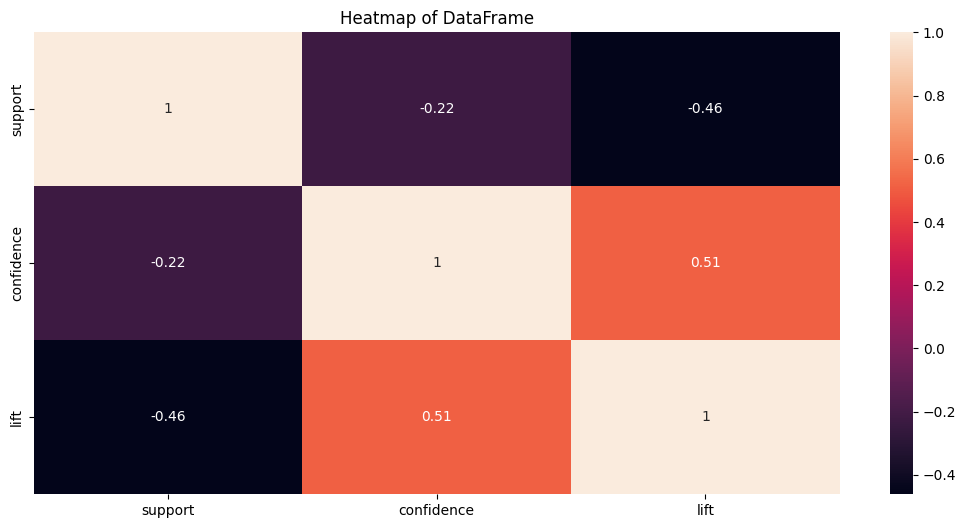

In [ ]:
plt.figure(figsize=(13, 6))
sns.heatmap(matching_tuples.drop('consequents', axis=1).corr(), annot=True)
plt.title('Heatmap of DataFrame')
plt.show()


## Subpart E

### First Try

In [ ]:
df = pd.DataFrame(transactions)
df = df.stack().reset_index(level=1, drop=True).to_frame('item')
df['transaction'] = df.index
df = df.pivot_table(index='transaction', columns='item', aggfunc=lambda x: 1, fill_value=0)

frequent_itemsets = apriori_SK(df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3, num_itemsets=True)

sorted_rules = rules.sort_values(by='lift', ascending=False)

# Get the top 10 rules
top_10_rules =sorted_rules.head(10)
top_10_rules = top_10_rules[['consequents','support', 'confidence', 'lift']]
print("Top 10 rules sorted by lift:")
top_10_rules

Top 10 rules sorted by lift:


,consequents,support,confidence,lift
73,(root vegetables),0.010372,0.359155,3.294710
95,(root vegetables),0.012304,0.342776,3.144460
1,(root vegetables),0.017389,0.331395,3.040058
74,(other vegetables),0.010372,0.586207,3.029300
96,(other vegetables),0.012304,0.584541,3.020692
97,(root vegetables),0.023185,0.309783,2.841793
80,(yogurt),0.010067,0.385214,2.761075
91,(other vegetables),0.012203,0.502092,2.594626
100,(other vegetables),0.012914,0.500000,2.583815
122,(yogurt),0.015152,0.358173,2.567255


### Second Try

In [ ]:
df = pd.DataFrame(transactions)
df = df.stack().reset_index(level=1, drop=True).to_frame('item')
df['transaction'] = df.index
df = df.pivot_table(index='transaction', columns='item', aggfunc=lambda x: 1, fill_value=0)

frequent_itemsets = apriori_SK(df, min_support=0.003, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1, num_itemsets=True)

sorted_rules = rules.sort_values(by='lift', ascending=False)

# Get the top 10 rules
top_10_rules =sorted_rules.head(10)
top_10_rules = top_10_rules[['consequents','support', 'confidence', 'lift']]
print("Top 10 rules sorted by lift:")
top_10_rules

Top 10 rules sorted by lift:


,consequents,support,confidence,lift
4499,"(other vegetables, whole milk, citrus fruit)",0.003152,0.149758,11.505661
4494,"(root vegetables, tropical fruit)",0.003152,0.242187,11.505661
0,(hamburger meat),0.003051,0.379747,11.420276
4502,"(other vegetables, whole milk, tropical fruit)",0.003152,0.178161,10.428777
4491,"(root vegetables, citrus fruit)",0.003152,0.184524,10.428777
4496,"(other vegetables, tropical fruit)",0.003152,0.344444,9.595656
4500,"(root vegetables, whole milk, tropical fruit)",0.003152,0.109155,9.096861
4493,"(other vegetables, citrus fruit)",0.003152,0.262712,9.096861
543,(sugar),0.004983,0.286550,8.462252
544,(flour),0.004983,0.147147,8.462252
